# Covid-19 Data Analysis(India)

# Introduction -
- Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

**The number of new cases are increasing day by day around the world.**

- Question that are from intrested are -

1) Which state has most number of Confirmed Cases?

2) Which state has most number of Cured Cases?

3) Which state has most number of Death Cases?

4) Mortality rate of Maharastra?

5) Recovery Rate of Maharastra?

6) Which Age group has heigher chance of getting infected?

7) Which Age group has Lower chance of getting infected?

8) Which state has better Public Health care facilities?

9) 


**DataSet Collected from -**   [COVID-19 in India]('https://www.kaggle.com/sudalairajkumar/covid19-in-india') 


In [42]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

##  DataSet Covid-19 India

In [2]:
# read the csv 

df = pd.read_csv("Dataset/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
# Number of row and column in  the dataset

print(" Number of row in the dataset are :", df.shape[0])
print(" Number of column in the dataset are :", df.shape[1])

 Number of row in the dataset are : 4071
 Number of column in the dataset are : 9


In [4]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 9 columns):
Sno                         4071 non-null int64
Date                        4071 non-null object
Time                        4071 non-null object
State/UnionTerritory        4071 non-null object
ConfirmedIndianNational     4071 non-null object
ConfirmedForeignNational    4071 non-null object
Cured                       4071 non-null int64
Deaths                      4071 non-null int64
Confirmed                   4071 non-null int64
dtypes: int64(4), object(5)
memory usage: 286.4+ KB


In [5]:
# dataset describe

df.describe()

,Sno,Cured,Deaths,Confirmed
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,2036.000000,3111.314910,168.402113,5732.080324
std,1175.340802,10887.115076,737.798086,19306.478679
min,1.000000,0.000000,0.000000,0.000000
25%,1018.500000,3.000000,0.000000,30.000000
50%,2036.000000,67.000000,3.000000,335.000000
75%,3053.500000,1386.500000,36.500000,3055.000000
max,4071.000000,140325.000000,10289.000000,254427.000000


In [6]:
# check weather dataset contain any null values

df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
# check dataset contain any duplicate value

print("Number of duplicate value in the dataset are :", sum(df.duplicated()))

Number of duplicate value in the dataset are : 0


In [8]:
# Remove the unneccesary column in the dataset

df_new = df.drop(['ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1)

df_new.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,0,0,1
1,2,31/01/20,6:00 PM,Kerala,0,0,1
2,3,01/02/20,6:00 PM,Kerala,0,0,2
3,4,02/02/20,6:00 PM,Kerala,0,0,3
4,5,03/02/20,6:00 PM,Kerala,0,0,3


In [9]:
# select the data of date 10/07/20

covid_new = df_new[df_new['Date'] == '10/07/20']

In [45]:
# sort the dataset of top 10 state with most confirmed cases on 10/07/20

covid_new.sort_values(by='Confirmed', ascending=False)[:10]

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3946,3947,10/07/20,8:00 AM,Maharashtra,127259,9667,230599
3956,3957,10/07/20,8:00 AM,Tamil Nadu,78161,1765,126581
3935,3936,10/07/20,8:00 AM,Delhi,82226,3258,107051
3937,3938,10/07/20,8:00 AM,Gujarat,27718,2008,39194
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,21127,862,32362
3942,3943,10/07/20,8:00 AM,Karnataka,12833,486,31105
3957,3958,10/07/20,8:00 AM,Telangana,18192,331,30946
3961,3962,10/07/20,8:00 AM,West Bengal,16826,854,25911
3928,3929,10/07/20,8:00 AM,Andhra Pradesh,12154,277,23814
3954,3955,10/07/20,8:00 AM,Rajasthan,17070,491,22563


- **Maharashtra has most number of confirmed cases 230599 on 10/07/2020**

In [46]:
# sort the dataset of top 10 state with most Death cases on 10/07/20

covid_new.sort_values(by="Deaths", ascending=False)[:10]


,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3946,3947,10/07/20,8:00 AM,Maharashtra,127259,9667,230599
3935,3936,10/07/20,8:00 AM,Delhi,82226,3258,107051
3937,3938,10/07/20,8:00 AM,Gujarat,27718,2008,39194
3956,3957,10/07/20,8:00 AM,Tamil Nadu,78161,1765,126581
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,21127,862,32362
3961,3962,10/07/20,8:00 AM,West Bengal,16826,854,25911
3945,3946,10/07/20,8:00 AM,Madhya Pradesh,12232,634,16341
3954,3955,10/07/20,8:00 AM,Rajasthan,17070,491,22563
3942,3943,10/07/20,8:00 AM,Karnataka,12833,486,31105
3957,3958,10/07/20,8:00 AM,Telangana,18192,331,30946


- **Maharashtra has most number of Deaths cases 9667 on 10/07/2020**

In [137]:
# sort the dataset of top 10 state with most number of recovery on 10/07/20

covid_new.sort_values(by="Cured", ascending=False)[:10]


,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
3946,3947,10/07/20,8:00 AM,Maharashtra,127259,9667,230599
3935,3936,10/07/20,8:00 AM,Delhi,82226,3258,107051
3956,3957,10/07/20,8:00 AM,Tamil Nadu,78161,1765,126581
3937,3938,10/07/20,8:00 AM,Gujarat,27718,2008,39194
3960,3961,10/07/20,8:00 AM,Uttar Pradesh,21127,862,32362
3957,3958,10/07/20,8:00 AM,Telangana,18192,331,30946
3954,3955,10/07/20,8:00 AM,Rajasthan,17070,491,22563
3961,3962,10/07/20,8:00 AM,West Bengal,16826,854,25911
3938,3939,10/07/20,8:00 AM,Haryana,14510,287,19369
3942,3943,10/07/20,8:00 AM,Karnataka,12833,486,31105


- **Maharashtra has most number of Cured cases 127259 on 10/07/2020**

In [142]:
# Mortality rate of maharastra

(covid_new['Deaths'].max()/covid_new['Confirmed'].max())*100

4.192125724742952

- **Mortality rate of Maharastra drops to 4.192 %**

In [143]:
# recovery rate of Maharastra

(covid_new['Cured'].max()/covid_new['Confirmed'].max())*100

55.18627574273957

- **Recovery Rate of Maharastra are 55.1862 %**

## Dataset - Age Group Detail

In [48]:
# read the csv

df_age = pd.read_csv('Dataset/AgeGroupDetails.csv')
df_age.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [49]:
# dataset info

df_age.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Sno           10 non-null int64
AgeGroup      10 non-null object
TotalCases    10 non-null int64
Percentage    10 non-null object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [50]:
# dataset describe

df_age.describe()

,Sno,TotalCases
count,10.00000,10.000000
mean,5.50000,69.200000
std,3.02765,59.241127
min,1.00000,9.000000
25%,3.25000,23.250000
50%,5.50000,52.500000
75%,7.75000,106.250000
max,10.00000,172.000000


In [83]:
# check weather dataset contain any null values

print("The number of value dtaset contain are :",df_age.isnull().sum())

The number of value dtaset contain are : Sno           0
AgeGroup      0
TotalCases    0
Percentage    0
dtype: int64


- **Clearly, dataset contain 0 null values.**

In [15]:

df_age.sort_values(by="TotalCases", ascending=False)

,Sno,AgeGroup,TotalCases,Percentage
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
6,7,60-69,89,12.86%
5,6,50-59,77,11.13%
7,8,70-79,28,4.05%
1,2,10-19,27,3.90%
0,1,0-9,22,3.18%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [53]:
# check weather the dataset contain null value or not

print("The number of nulll value in the dataset are :", df_age.isnull().sum())

The number of nulll value in the dataset are : Sno           0
AgeGroup      0
TotalCases    0
Percentage    0
dtype: int64


- **Now, the dataset contains 0 null values**

In [144]:
df_age.sort_values(by="TotalCases", ascending=False)

,Sno,AgeGroup,TotalCases,Percentage
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
6,7,60-69,89,12.86%
5,6,50-59,77,11.13%
7,8,70-79,28,4.05%
1,2,10-19,27,3.90%
0,1,0-9,22,3.18%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


- **From the above data Age group between 20-29 has heigher chance of getting infected**
- **From the above data Age group more than or equals to 80 has lower chance of getting infected**


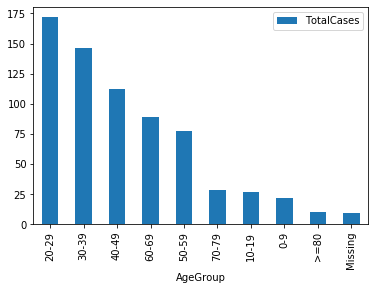

In [145]:
df_age.sort_values(by="TotalCases", ascending=False).plot(x = 'AgeGroup', y='TotalCases', kind = 'bar')

## DataSet - Hospitals Bed in India

In [55]:
# read the dataset

df_hospital = pd.read_csv("Dataset/HospitalBedsIndia.csv")

df_hospital.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [57]:
# dataset info

df_hospital.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
Sno                                 37 non-null int64
State/UT                            37 non-null object
NumPrimaryHealthCenters_HMIS        37 non-null object
NumCommunityHealthCenters_HMIS      37 non-null int64
NumSubDistrictHospitals_HMIS        30 non-null float64
NumDistrictHospitals_HMIS           37 non-null int64
TotalPublicHealthFacilities_HMIS    37 non-null int64
NumPublicBeds_HMIS                  37 non-null int64
NumRuralHospitals_NHP18             37 non-null int64
NumRuralBeds_NHP18                  37 non-null int64
NumUrbanHospitals_NHP18             37 non-null int64
NumUrbanBeds_NHP18                  37 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 3.6+ KB


In [59]:
# sort the value of dataset Total health care facilities

df_hospital.sort_values(by='TotalPublicHealthFacilities_HMIS', ascending=False)[1:10]

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
33,34,Uttar Pradesh,3277,671,NaN,174,4122,58310,4442,39104,193,37156
20,21,Maharashtra,2638,430,101.0,70,3239,68998,273,12398,438,39048
28,29,Rajasthan,2463,579,64.0,33,3139,51844,602,21088,150,10760
16,17,Karnataka,2547,207,147.0,42,2943,56333,2471,21072,374,49093
30,31,Tamil Nadu,1854,385,310.0,32,2581,72616,692,40179,525,37353
11,12,Gujarat,1770,385,44.0,37,2236,41129,364,11715,122,20565
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
35,36,West Bengal,1374,406,70.0,55,1905,51163,1272,19684,294,58882
19,20,Madhya Pradesh,1420,324,72.0,51,1867,38140,334,10020,117,18819


- **Uttar Pradesh is top in terms of Total Public Health Care has 4122**

In [61]:
df_hospital.sort_values(by="NumPublicBeds_HMIS", ascending=False)[1:10]

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
30,31,Tamil Nadu,1854,385,310.0,32,2581,72616,692,40179,525,37353
20,21,Maharashtra,2638,430,101.0,70,3239,68998,273,12398,438,39048
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
33,34,Uttar Pradesh,3277,671,NaN,174,4122,58310,4442,39104,193,37156
16,17,Karnataka,2547,207,147.0,42,2943,56333,2471,21072,374,49093
28,29,Rajasthan,2463,579,64.0,33,3139,51844,602,21088,150,10760
35,36,West Bengal,1374,406,70.0,55,1905,51163,1272,19684,294,58882
11,12,Gujarat,1770,385,44.0,37,2236,41129,364,11715,122,20565
17,18,Kerala,933,229,82.0,53,1297,39511,981,16865,299,21139


- **Tamil Nadu is top in terms of Number of Public Beds has total 72616 beds**

In [62]:
df_hospital.sort_values(by="NumUrbanBeds_NHP18", ascending=False)[1:10]

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
35,36,West Bengal,1374,406,70.0,55,1905,51163,1272,19684,294,58882
16,17,Karnataka,2547,207,147.0,42,2943,56333,2471,21072,374,49093
20,21,Maharashtra,2638,430,101.0,70,3239,68998,273,12398,438,39048
30,31,Tamil Nadu,1854,385,310.0,32,2581,72616,692,40179,525,37353
33,34,Uttar Pradesh,3277,671,NaN,174,4122,58310,4442,39104,193,37156
9,10,Delhi,534,25,9.0,47,615,20572,0,0,109,24383
17,18,Kerala,933,229,82.0,53,1297,39511,981,16865,299,21139
11,12,Gujarat,1770,385,44.0,37,2236,41129,364,11715,122,20565
19,20,Madhya Pradesh,1420,324,72.0,51,1867,38140,334,10020,117,18819


- West Bengal is at top in terms of number of urban beds

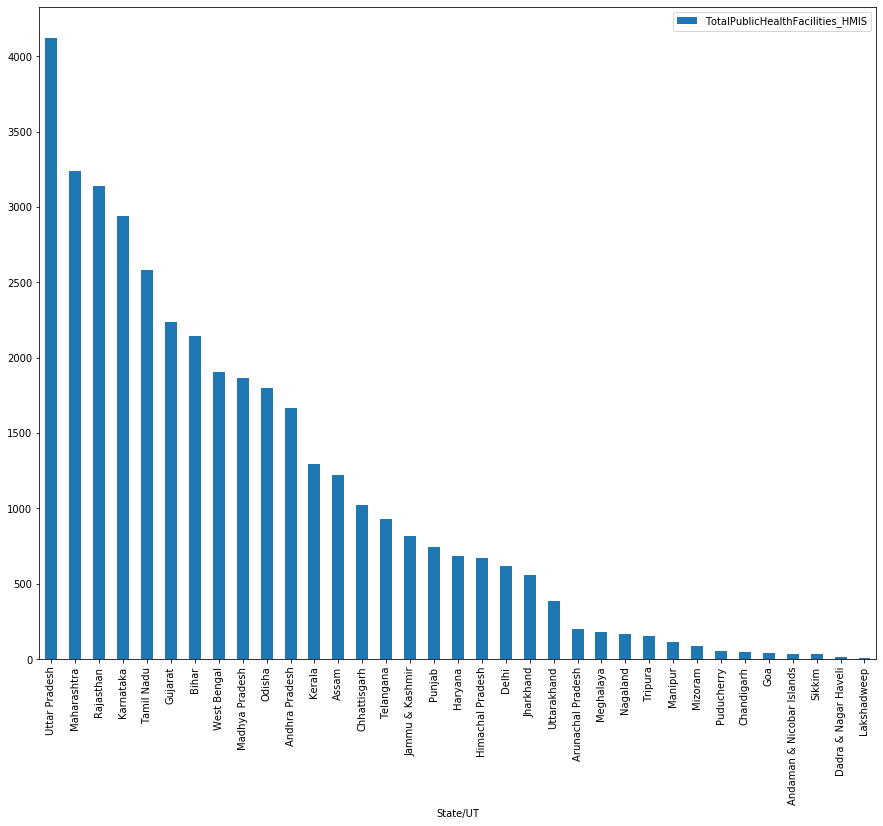

In [19]:
df_hospital.sort_values(by="TotalPublicHealthFacilities_HMIS", ascending=False)[1:36].plot(x='State/UT',y='TotalPublicHealthFacilities_HMIS',kind='bar', figsize=(15,12))


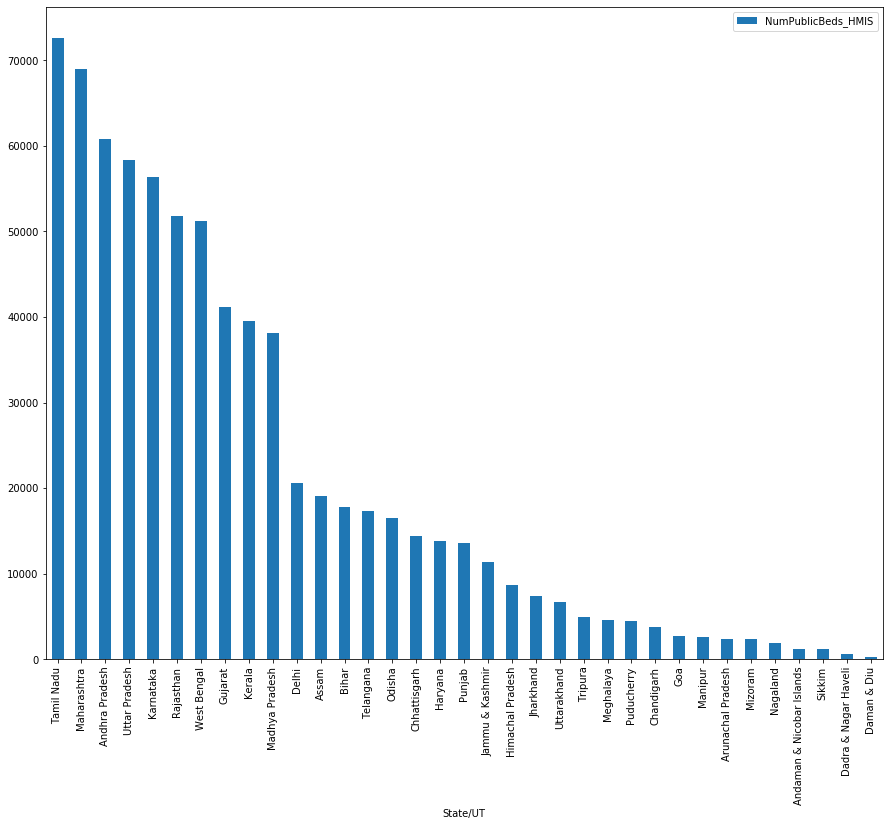

In [20]:
df_hospital.sort_values(by="NumPublicBeds_HMIS", ascending=False)[1:36].plot(x='State/UT',y='NumPublicBeds_HMIS',kind='bar', figsize=(15,12))


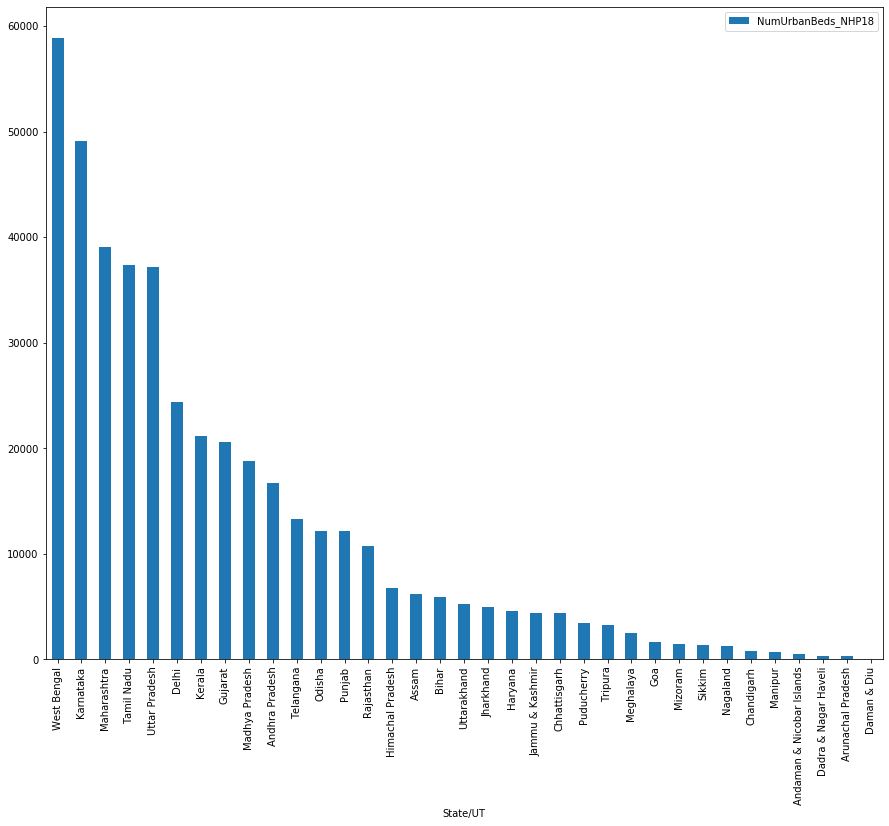

In [21]:
df_hospital.sort_values(by="NumUrbanBeds_NHP18", ascending=False)[1:36].plot(x='State/UT',y='NumUrbanBeds_NHP18',kind='bar', figsize=(15,12))


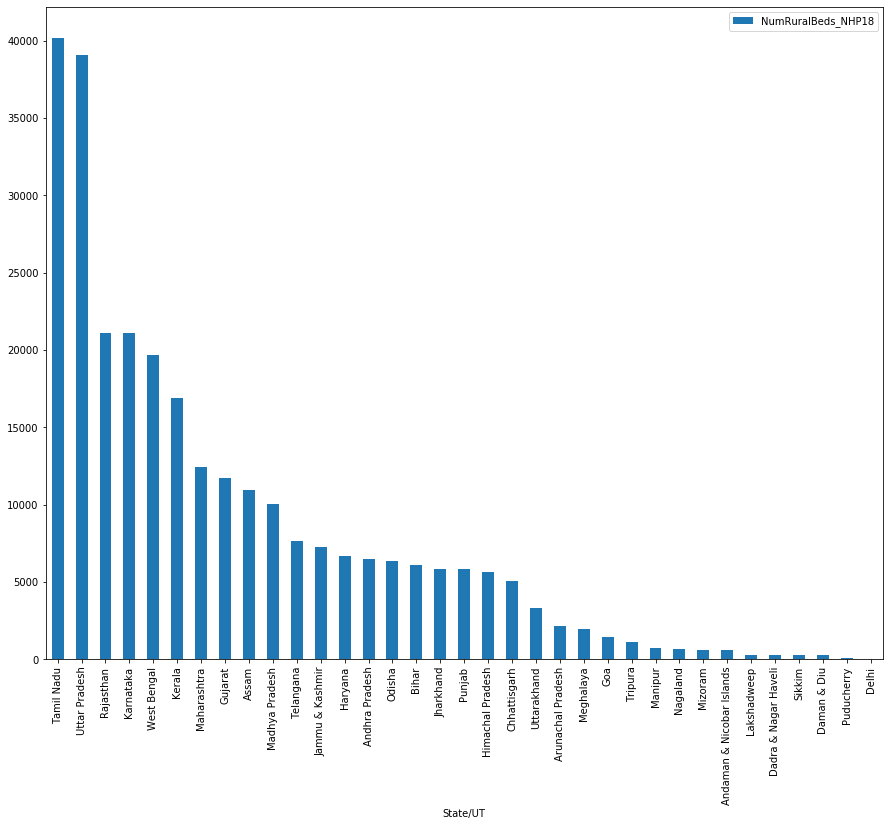

In [22]:
df_hospital.sort_values(by="NumRuralBeds_NHP18", ascending=False)[1:36].plot(x='State/UT',y='NumRuralBeds_NHP18',kind='bar', figsize=(15,12))


## DataSet - Individual Details

In [64]:
# read the dataset

df_individual = pd.read_csv("Dataset/IndividualDetails.csv")
df_individual.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [66]:
# dataset info

df_individual.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 12 columns):
id                    28182 non-null int64
government_id         2997 non-null object
diagnosed_date        28182 non-null object
age                   2346 non-null object
gender                5313 non-null object
detected_city         2350 non-null object
detected_district     21198 non-null object
detected_state        28182 non-null object
nationality           2709 non-null object
current_status        28182 non-null object
status_change_date    27780 non-null object
notes                 26847 non-null object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB


In [68]:
# current status 

df_individual['current_status'].value_counts()

Hospitalized    27953
Recovered         182
Deceased           46
Migrated            1
Name: current_status, dtype: int64

- **According to DataSet 27953 are Hospitalized**
- **According to DataSet 182 are Recovered**         
- **According to DataSet 46 are Deceased**  
- **According to DataSet 1 are Migrated**                       

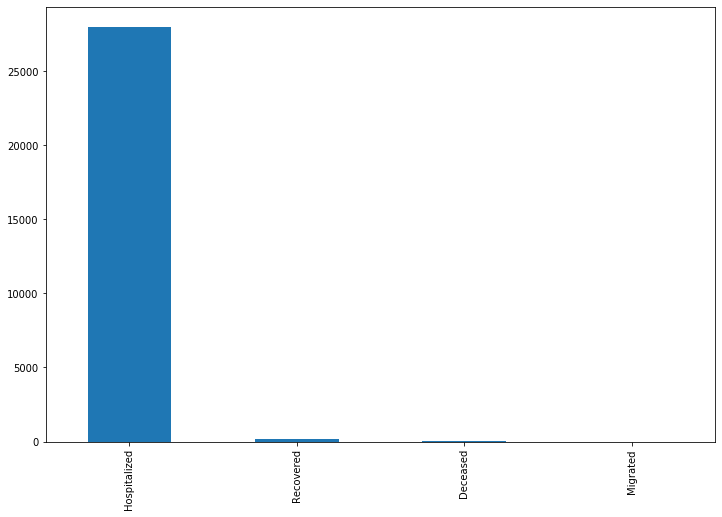

In [25]:
df_individual['current_status'].value_counts().plot(kind='bar', figsize=(12,8))


## DataSet - StateWise Testing Details

In [73]:
# read the datset

df_testing = pd.read_csv("Dataset/StatewiseTestingDetails.csv")
df_testing

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
3013,2020-07-08,West Bengal,572523.0,NaN,24823.0
3014,2020-07-09,West Bengal,583328.0,NaN,25911.0
3015,2020-07-10,West Bengal,593967.0,NaN,27109.0
3016,2020-07-11,West Bengal,605370.0,NaN,28453.0


In [75]:
# dataset Info

df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 5 columns):
Date            3018 non-null object
State           3018 non-null object
TotalSamples    3018 non-null float64
Negative        2080 non-null object
Positive        3009 non-null float64
dtypes: float64(2), object(3)
memory usage: 118.0+ KB


In [91]:
# coverte the negative column from string to float


df_testing_details = pd.DataFrame(df_testing)

df_testing_details['Negative'] = pd.to_numeric(df_testing_details['Negative'], errors='coerce')

df_testing_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 5 columns):
Date            3018 non-null object
State           3018 non-null object
TotalSamples    3018 non-null float64
Negative        2079 non-null float64
Positive        3009 non-null float64
dtypes: float64(3), object(2)
memory usage: 118.0+ KB


In [79]:
# Check weather the Negative column converted from string to float or not

print("Datatype of Negative column are :", df_testing_details['Negative'].dtype)

Datatype of Negative column are : float64


- **Negative Column converted to float**

In [84]:
# check weather dataset contain any null values

print("The number of value dtaset contain are :",df_testing_details.isnull().sum())

The number of value dtaset contain are : Date              0
State             0
TotalSamples      0
Negative        939
Positive          9
dtype: int64


In [86]:
# remove the null values

df_test = df_testing_details.dropna(subset=['Negative', 'Positive'])

In [88]:
# Check the null values are droped or not

print("The number of null value dataset contains are :",df_test.isnull().sum())

The number of null value dataset contains are : Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64


- **Clearly, all null value are removed now**

In [107]:
# sort the dataset by number of positive cases

df_test.sort_values(by='Negative', ascending = False)[:10]

,Date,State,TotalSamples,Negative,Positive
151,2020-07-12,Andhra Pradesh,1153849.0,1124681.0,29168.0
150,2020-07-11,Andhra Pradesh,1136225.0,1108990.0,27235.0
149,2020-07-10,Andhra Pradesh,1115635.0,1090213.0,25422.0
2604,2020-06-30,Tamil Nadu,1170683.0,1080516.0,90167.0
148,2020-07-09,Andhra Pradesh,1094615.0,1070801.0,23814.0
1770,2020-07-12,Maharashtra,1321715.0,1062678.0,259037.0
147,2020-07-08,Andhra Pradesh,1077733.0,1055474.0,22259.0
2603,2020-06-29,Tamil Nadu,1140441.0,1054217.0,86224.0
1769,2020-07-11,Maharashtra,1289325.0,1037883.0,251442.0
146,2020-07-07,Andhra Pradesh,1050090.0,1028897.0,21197.0


- From above dataset we conclude  that - 
- **Maharashtra has 259037 positive cases out of 1321715.0 on 12/07/2020**
- **Maharashtra has 1062678.0 negative cases out of 1321715.0 on 12/07/2020** 

### we are going to analyis the Maharastra cases.
- **Maharastra has max total Sample on 12/07/2020**

In [ ]:
# consider for date 12/07/2020

df_test_date = df_test[df_test['Date'] == '2020-07-12']


In [ ]:
# make a df for state Maharastra for date 12/07/2020

df_test_maha = df_test_date[df_test_date["State"]=='Maharashtra']

In [130]:
# Maximum total sample for Maharastra on date 12/07/2020

df_test_maha['TotalSamples'].max()

1321715.0

 - **Maximum total sample for Maharastra on date 12/07/2020 are 1321715.0**


In [131]:
# Maximum total Positive sample for Maharastra on date 12/07/2020

df_test_maha['Positive'].max()

259037.0

- **Maximum total Positive sample for Maharastra on date 12/07/2020 are 259037.0**



In [133]:
# Maximum total Negative sample for Maharastra on date 12/07/2020

df_test_maha['Negative'].max()

1062678.0

- **Maximum total Negative sample for Maharastra on date 12/07/2020 are 1062678.0**




In [134]:
# Total Percentage of being positive

(df_test_maha['Positive'].max()/df_test_maha['TotalSamples'].max())*100

19.598551881457045

- **Hence, Total Percentage of being Positive are 19.5985 %**

In [136]:
# Total Percentage of being Negative

(df_test_maha['Negative'].max()/df_test_maha['TotalSamples'].max())*100

80.40144811854294

- **Hence, Total Percentage of being Negative are 80.401 %**

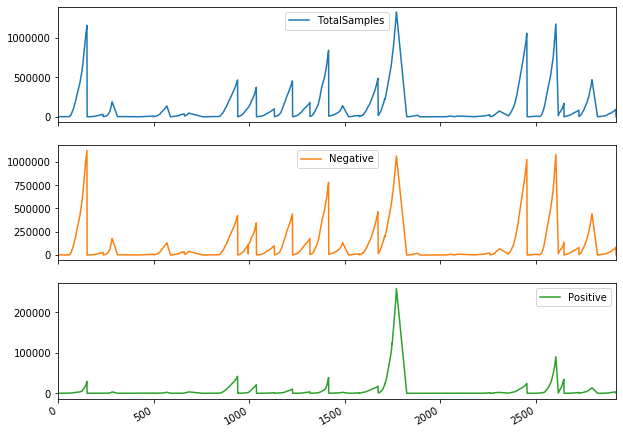

In [128]:
df_line = df_test.plot.line(subplots = True, figsize=(10,8))

In [122]:
(df_test_maha['Negative'].max()/df_test_maha['TotalSamples'].max())*100

80.40144811854294

19.598551881457045

1321715.0

In [ ]:
# plot the bar graph of top 10 state with most number of confirmed cases on 10/07/20

covid_new.sort_values(by="Confirmed", ascending=False)[:10].plot(x='State/UnionTerritory',y='Confirmed',kind='bar')


In [ ]:
covid_new.sort_values(by="Deaths", ascending=False)[:10].plot(x='State/UnionTerritory',y='Deaths',kind='bar')



In [ ]:
covid_new.sort_values(by="Cured", ascending=False)[:10].plot(x='State/UnionTerritory',y='Cured',kind='bar')


In [ ]:
covid_mh = df[df['State/UnionTerritory'] == "Maharashtra"].plot(x = "Date", y = "Confirmed", figsize = (10,6), fontsize = 16)

covid_mh.set_title("Number of cases increaes in Maharastra Day by Day", fontsize=20)
covid_mh.set_xlabel("Dates", fontsize = 20)
covid_mh.set_ylabel("Number of cases", fontsize= 20)

In [ ]:
covid_dh = df[df['State/UnionTerritory']== 'Delhi'].plot(x =  "Date", y = "Confirmed", figsize = (10,6), fontsize = 16)

covid_dh.set_title("Number of cases increaes in Delhi Day by Day", fontsize=20)
covid_dh.set_xlabel("Dates", fontsize = 20)
covid_dh.set_ylabel("Number of cases", fontsize= 20)


In [ ]:
covid_mani = df[df['State/UnionTerritory']== 'Manipur'].plot(x =  "Date", y = "Confirmed", figsize = (10,6), fontsize = 16)

covid_mani.set_title("Number of cases increaes in Manipur Day by Day", fontsize=20)
covid_mani.set_xlabel("Dates", fontsize = 20)
covid_mani.set_ylabel("Number of cases", fontsize= 20)

In [ ]:
#graph showing Goa not having new cases in april month
goa=df[df['State/UnionTerritory']=='Goa'].plot(x='Date',y='Confirmed',figsize = (10,6),fontsize=16)
goa.legend_.remove()
goa.set_title("Goa", fontsize=20)
goa.set_xlabel('Dates', fontsize=20)
goa.set_ylabel('No. of cases', fontsize=20)